<a href="https://colab.research.google.com/github/hank199599/deep_learning_keras_log/blob/main/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機器學習的四個分支
* 監督式學習 Supervised learning：所有訓練資料都有相對應的標籤
* 非監督式學習 Unsupervised learning：輸入資料沒有任何標籤找出其中有意義的表示法
* 自監督式學習 Self-supervised learning：一種沒有人工標註標籤的監督式學習
* 增強式學習 Reinforcement learning

# 評估機器學習模型

## 1. 把資料拆分為訓練集、驗證集、測試集
* 訓練資料集 training set
* 驗證資料集 validation set
* 測試資料集 testing set
  
在訓練過程中，使用驗證集進行測試亦可能發生**資訊洩漏(information leak)**，  
進而導致模型對該資料集過度配適。

### 簡單拆分驗證
使用驗證集來調整模型  
缺陷：可用資料很少的情況下，驗證及和測試集的樣本會太少，統計代表性不足  
![3-3](https://github.com/hank199599/deep_learning_keras_log/blob/main/pictures/3-3.png?raw=true)  
  

```python
nav_validation_samples = 10000 #設定預設的驗證集資料筆數

np.random.shuffle(data) # 打散資料，重新洗牌
validation_data = data[:nav_validation_samples] # 定義前10000筆(0~9999)為驗證集

training_data = date[:]

model = get_model()
model.train(training_data) # 以訓練集資料進行模型訓練
validation_score = model.evaluate(validation_data) # 以驗證集資料進行模型評估

#對模型不斷進行：調整、訓練與評估


model = get_model()
#完成超參數的調整後，通常會使用完整的資料(訓練集+驗證集)來訓練一次
model.train(np.concatenate([training_data,validation_data]))
test_score = model.evaluate(test_data)
```



### K折驗證



```python
k=4 # 進行4折交叉驗證
nav_validation_samples = len(data) #設定預設的驗證集資料筆數

np_random.shuffle(data)
validation_scores=[]
for flod in range(k):
  validation_data = data[nav_validation_samples*flod:nav_validation_samples*(flod+1)]
  teaining_data=data[:nav_validation_samples*flod]+data[nav_validation_samples*(flod+1):]

  model = get_model()
  model.train(training_data)
  validation_score = model.evaluate(validation_data)
  validation_scores.appned(validation_score)

validation_score=np.average(validation_scores)

model=get_model()
model.train(data)
test_score = model.evaluate(test_data)
  
```



### 多次洗牌的K折驗證
此方法適用於可用資料較少且須要盡可能精確地評估模型的情況

## 2. 注意事項
* 資料代表性：需**隨機打散(randomly shuffle)**使資料及具有代表性
* 時間方向性：避免**時間漏失(temporal leak)**
* 資料中的重複現象：確保訓練集與驗證集沒有交集發生

# 資料預處理 (preprocwaaing)
讓手邊的原始資料更符合神經網路使用
* 向量化 (Vertorization)：將資料轉換為**浮點數的張量**
* 數值正規化 (Normalization)：使輸入資料的標準差為1，平均值為0
 * 取小值
 * 同質性
 * 單獨正規化每個特徵
* 處理缺失值 (Missing Values)：將缺失值補為0 (前提是0必須是個沒意義的值)
* 特徵提取：

# 特徵工程
透過資深知識對手邊資料與機器學習的理解，直接以人工方式去轉換資料

# 低度配適與過度配適
* 最佳化(Optimization)：調整模型使得能在訓練資料上獲得最佳表現的過程
* 普適性(Generalization)：已訓練的模型對從未見過得資料的預測能力

## 常規化 (regularization) 的幾種手段
1. 取得更多訓練資料 
2. 調配模型儲存的資訊量或限制儲存資訊的類型或數值

## 縮減神經網路的大小
減少模型可用來學習的**參數(記憶能力)數量

In [2]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)

x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))  #原始的為 16 個單元
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

### 程式 4.4 容量較低的模型版本

In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))  #改成容量較低的 4 個單元
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [5]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 57ms/step - loss: 0.5445 - acc: 0.7658 - val_loss: 0.3379 - val_acc: 0.8814
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2722 - acc: 0.9049 - val_loss: 0.2897 - val_acc: 0.8858
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2019 - acc: 0.9307 - val_loss: 0.3067 - val_acc: 0.8752
Epoch 4/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1687 - acc: 0.9426 - val_loss: 0.2943 - val_acc: 0.8833
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1398 - acc: 0.9525 - val_loss: 0.3203 - val_acc: 0.8776
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1221 - acc: 0.9587 - val_loss: 0.3371 - val_acc: 0.8750
Epoch 7/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1036 - acc: 0.9661 - val_loss: 0.3616 - val_acc: 0.8722
Epoch 8/20
49/49 [==============================] - 2s 38ms/step - loss: 0.0949 - a

In [7]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 48ms/step - loss: 0.5812 - acc: 0.7245 - val_loss: 0.4165 - val_acc: 0.8604
Epoch 2/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3494 - acc: 0.8929 - val_loss: 0.3295 - val_acc: 0.8822
Epoch 3/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2604 - acc: 0.9174 - val_loss: 0.2943 - val_acc: 0.8878
Epoch 4/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2162 - acc: 0.9299 - val_loss: 0.2837 - val_acc: 0.8883
Epoch 5/20
49/49 [==============================] - 2s 34ms/step - loss: 0.1839 - acc: 0.9403 - val_loss: 0.2808 - val_acc: 0.8886
Epoch 6/20
49/49 [==============================] - 2s 34ms/step - loss: 0.1669 - acc: 0.9436 - val_loss: 0.2857 - val_acc: 0.8864
Epoch 7/20
49/49 [==============================] - 2s 34ms/step - loss: 0.1482 - acc: 0.9524 - val_loss: 0.2908 - val_acc: 0.8856
Epoch 8/20
49/49 [==============================] - 2s 34ms/step - loss: 0.1377 - a

In [8]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

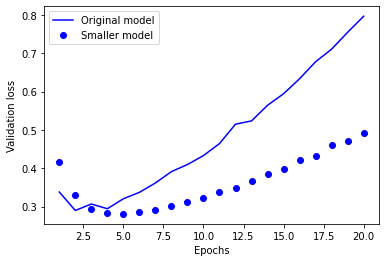

In [9]:
import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'b-', label='Original model')

plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

### 程式 4.5 具有更高容量的模型版本

In [10]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))  #改以更高容量的 512 個輸出單位
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [11]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 16s 327ms/step - loss: 0.6349 - acc: 0.7219 - val_loss: 0.2981 - val_acc: 0.8775
Epoch 2/20
49/49 [==============================] - 16s 323ms/step - loss: 0.2156 - acc: 0.9143 - val_loss: 0.2817 - val_acc: 0.8880
Epoch 3/20
49/49 [==============================] - 16s 323ms/step - loss: 0.1239 - acc: 0.9538 - val_loss: 0.2965 - val_acc: 0.8853
Epoch 4/20
49/49 [==============================] - 16s 322ms/step - loss: 0.0484 - acc: 0.9868 - val_loss: 0.4588 - val_acc: 0.8788
Epoch 5/20
49/49 [==============================] - 16s 324ms/step - loss: 0.0481 - acc: 0.9918 - val_loss: 0.4974 - val_acc: 0.8818
Epoch 6/20
49/49 [==============================] - 16s 323ms/step - loss: 0.0084 - acc: 0.9984 - val_loss: 0.5105 - val_acc: 0.8640
Epoch 7/20
49/49 [==============================] - 16s 322ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.7098 - val_acc: 0.8812
Epoch 8/20
49/49 [==============================] - 16s 324ms/step - 

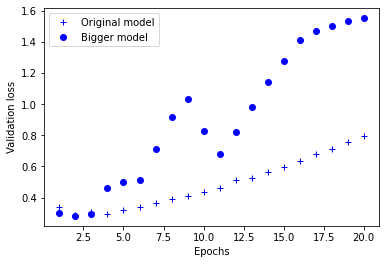

In [12]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

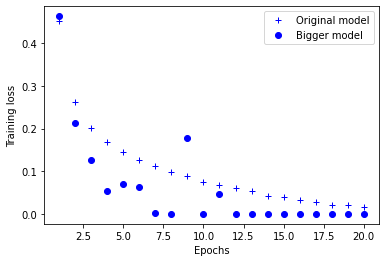

In [13]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

## 加入權重常規化
採用較小的權重值以抑制神經網路的複雜性  
* L1常規化：增加一**代價項**，與權重係數的絕對值成正比
* L2常規化/權重衰減：增加一**代價項**，與權重係數的平方成正比
於訓練時才會使用到L1、L2正規化，在驗證與測試時會自動拿掉


In [14]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),  #加入 L2 權重常規化並將學習率設為 0.001 
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2(0.001)代表該層權重矩陣的每個係數都會加上(0.001*權重值)到神經網路的總損失函數上。

In [15]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [16]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 54ms/step - loss: 0.5904 - acc: 0.7363 - val_loss: 0.3968 - val_acc: 0.8596
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3220 - acc: 0.9034 - val_loss: 0.3276 - val_acc: 0.8894
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2596 - acc: 0.9245 - val_loss: 0.3250 - val_acc: 0.8875
Epoch 4/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2404 - acc: 0.9319 - val_loss: 0.3294 - val_acc: 0.8862
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2205 - acc: 0.9402 - val_loss: 0.3403 - val_acc: 0.8829
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2125 - acc: 0.9438 - val_loss: 0.3446 - val_acc: 0.8806
Epoch 7/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2082 - acc: 0.9470 - val_loss: 0.3659 - val_acc: 0.8762
Epoch 8/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2010 - a

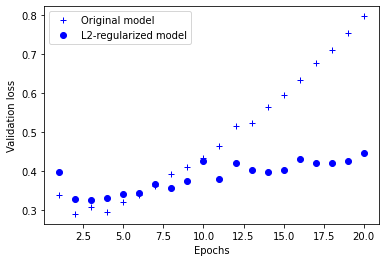

In [17]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [20]:
from tensorflow.keras import regularizers

regularizers.l1(0.001)  #L1 常規化

regularizers.l1_l2(l1=0.001, l2=0.001)  #同時使用 L1 及 L2 常規化

## 丟棄法(Dropout)
```python
layer_output *= np.random.randint(0, high=2, size=layer_output.shape)
```  

  
```python
layer_output *= 0.5
```

  
```python
layer_output *= np.random.randint(0, high=2, size=layer_output.shape)
layer_output /= 0.5
```  
  
  
```python
model.add(layers.Dropout(0.5))
```


### 程式 4.8 將 Dropout 層添加到 IMDB 神經網路

In [23]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [24]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 7s 131ms/step - loss: 0.6254 - acc: 0.6407 - val_loss: 0.4134 - val_acc: 0.8598
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.4332 - acc: 0.8189 - val_loss: 0.3204 - val_acc: 0.8777
Epoch 3/20
49/49 [==============================] - 2s 39ms/step - loss: 0.3337 - acc: 0.8776 - val_loss: 0.2888 - val_acc: 0.8846
Epoch 4/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2799 - acc: 0.9026 - val_loss: 0.2774 - val_acc: 0.8871
Epoch 5/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2461 - acc: 0.9148 - val_loss: 0.2828 - val_acc: 0.8885
Epoch 6/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2188 - acc: 0.9310 - val_loss: 0.2919 - val_acc: 0.8873
Epoch 7/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1886 - acc: 0.9397 - val_loss: 0.3087 - val_acc: 0.8858
Epoch 8/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1804 - 

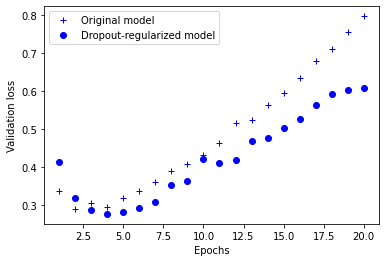

In [25]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# 機器學習的通用流程
1. 定義問題並建立資料集
2. 選擇一種評量成功的準則
3. 決定驗證程序
4. 準備資料
5. 開發出優於基準(baseline)的模型
6. 開發一個過度適配的模型
7. 常規化模型並調整參數